# The Spark Foundation #GRIPJUNE2021

# Task 1 - Prection using supervised ML

Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just two variables.


## By :- Shruti Dhawle

# Importing required libraries

In [8]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

# Reading data from remote Link

In [9]:
# Reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
# The shape of dataset 
data.shape

(25, 2)

In [11]:
# check the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# check the description of student_score data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the distribution of scores

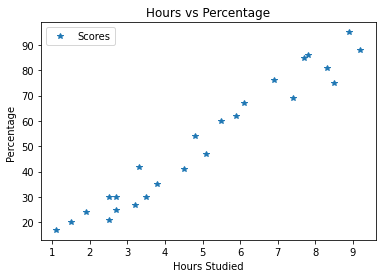

In [13]:
# Plotting the relationship between hours and scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage ')  
plt.show()

#### We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#  Preparing the data

In [14]:
# Divide the data into input and output
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

# Taining the model

In [18]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training of dataset is complete.")

Training of dataset is complete.


# Data Visualization

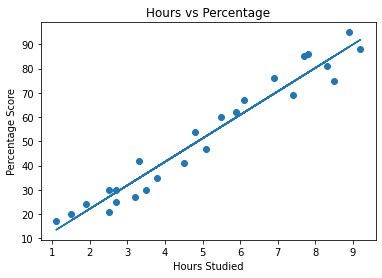

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Checking the accuracy scores for training and test set

In [21]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training Score
0.9491209376364416


# Making Predictions

In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [23]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [24]:
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [25]:
y_predict[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

# Comparing the actual versus predicted model 

In [26]:
# Comparing Actual vs Predicted
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


# Prediction

In [27]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [92.38611528]


# Evaluating the model

In [28]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1404.2200673968694
Mean absolute Error: 33.80918778157651


# Score of student who studied for 9.25 hours a day is 92.38611528